# Linear Regression

### Why use linear regression?
+ is simple to implement and easily interpretable algorithm
+ takes less training time to train even for huge datasets
+ linear regression coefficient are easy to interpret.

### Disadvantages of linear regression
+ Performance is easily effected by outlier presence.
+ assumes a linear relationship between independent variable and dependent variables, which can result in an increased error.

--------

# Data

dataset: https://www.kaggle.com/c/gradient-boston-housing/overview

crim - per capita crime rate by town.

zn - proportion of residential land zoned for lots over 25,000 sq.ft.

indus - proportion of non-retail business acres per town.

chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox - nitrogen oxides concentration (parts per 10 million).

rm - average number of rooms per dwelling.

age - proportion of owner-occupied units built prior to 1940.

dis - weighted mean of distances to five Boston employment centres.

rad - index of accessibility to radial highways.

tax - full-value property-tax rate per $10,000.

ptratio - pupil-teacher ratio by town.

black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat - lower status of the population (percent).

medv - median value of owner-occupied homes in $1000s (target).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [5]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
housing = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [7]:
housing.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
housing['MEDV'] = data['target']

In [9]:
housing.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# EDA

In [22]:
housing.corr()['MEDV'].sort_values(ascending=False)[1:]

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

We can see that medium housing value has the highest correlation with `RM` which is number of rooms. This makes sense as the house tends to be pricer when the number of rooms increase.

On the other hand, `LSTAT` has the highest negative correlation with medium housing value. This again makes sense as  lower status of the population may not attract people to move in. This may lead housing price to become lower.

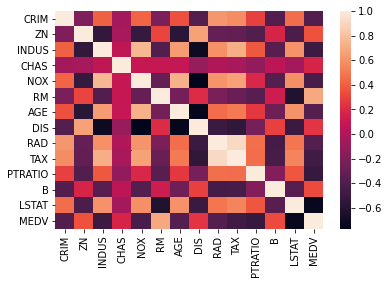

In [23]:
sns.heatmap(housing.corr());

# Split the data

In [24]:
X = housing.drop('MEDV', axis=1)
y = housing['MEDV']

In [25]:
X.shape, y.shape

((506, 13), (506,))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

# Model Evaluation

In [35]:
from sklearn import metrics

In [37]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

Mean Absolute Error:  3.189091965887879
Mean Squared Error:  24.291119474973797
Root Mean Squared Error:  4.928602182665364


### Comparison values between Actual and Predictions

In [46]:
comparison_df = pd.DataFrame({
    'Acutal': y_test.values.tolist(),
    'Predicted': y_pred.tolist()
})

In [47]:
comparison_df

,Acutal,Predicted
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880
...,...,...
97,17.9,-0.164237
98,9.6,13.684867
99,17.2,16.183597
100,22.5,22.276220


### learned Coefficient

In [48]:
lr.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

# Making prediction on Single Data Point

In [54]:
X_test.values[1].shape

(13,)

to make prediction on single record, the feature vector for the record should be in the form of row vector.

In [59]:
single_new_house = X_test.values[1].reshape(1,-1) # one row maintaing all columns in original form

In [60]:
single_new_house.shape

(1, 13)

In [61]:
lr.predict(single_new_house)

array([36.02556534])

Predicted value is 36.0255 thousands dollars. But the actual value is 32.4 thousands dollars. So our model prediction has an error of estimated 4 thousands dollars.

In [64]:
y_test.values[1]

32.4

--------